In [6]:
import sys
sys.path.append('../src')

In [7]:
import torch

from newsgen.tokenizer import NewsgenTokenizer

In [9]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
tok = NewsgenTokenizer('../src/pretrained/exp1.ckpt', device)

Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
VQLPIPSWithDiscriminator running with hinge loss.


In [10]:
inputs = ['Hello, my dog is cute', 'Hello, my cat is cute']

In [11]:
tok.encode_text(inputs[0])['input_ids'].shape

torch.Size([1, 1024])

In [12]:
tok.encode_text_batch(inputs)['input_ids'].shape

torch.Size([2, 1024])

In [13]:
import io

import torchvision
import numpy as np
import matplotlib.pyplot as plt
import requests

from PIL import Image


def download_image(url):
    resp = requests.get(url)
    resp.raise_for_status()
    return Image.open(io.BytesIO(resp.content))


def imshow(img, title=None):
    img = img.cpu()
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    img = np.transpose(npimg, (1, 2, 0))
    plt.imshow(img)
    if title is not None:
        plt.title(title)
    plt.axis('off')

In [14]:
sample_img = download_image('https://heibox.uni-heidelberg.de/f/7bb608381aae4539ba7a/?dl=1')

In [15]:
indices = tok.encode_image(sample_img)

In [16]:
indices.shape

torch.Size([256])

In [17]:
indices = indices.unsqueeze(0)

In [18]:
indices.shape

torch.Size([1, 256])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


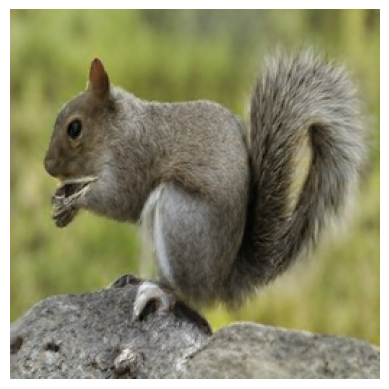

In [19]:
rec = tok.decode_images_code(indices)
imshow(torchvision.utils.make_grid(rec.detach()))
plt.show()

In [20]:
# Batch of images
indices = tok.encode_image_batch([sample_img, sample_img])

In [21]:
indices.shape

torch.Size([2, 256])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


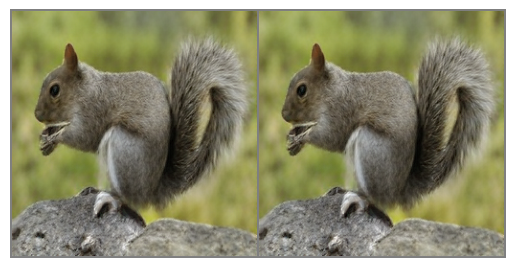

In [22]:
rec = tok.decode_images_code(indices)
imshow(torchvision.utils.make_grid(rec.detach()))
plt.show()